# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import requests
import json
import time

from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# base_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        #weather stats code
        # beckon JSON to retrieve data
        response = requests.get(city_url)

        status_code = response.status_code

        if status_code == 200:
            weather_data =response.json()
        else:
            weather_data = {} #request failed, womp

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data .get("coord", {}).get("lat")
        city_lng = weather_data.get("coord", {}).get("lon")
        city_max_temp = weather_data.get("main", {}).get("temp_max")
        city_humidity = weather_data.get("main", {}).get("humidity")
        city_clouds = weather_data.get("clouds", {}).get("all")
        city_wind = weather_data.get("wind", {}).get("speed")
        city_country = weather_data.get("sys", {}).get("country")
        city_date = weather_data.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

      # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass


              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | porto novo
Processing Record 6 of Set 1 | flying fish cove
Processing Record 7 of Set 1 | mili
Processing Record 8 of Set 1 | tarakan
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | saudarkrokur
Processing Record 14 of Set 1 | artigues-pres-bordeaux
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | strathalbyn
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | ghanzi
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | enewetak
Processing Record

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data = pd.DataFrame(city_data)

# Show Record Count
city_data.count()

City          602
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       574
Date          575
dtype: int64

In [14]:
city_data_df = city_data.dropna()
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 601
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        574 non-null    object 
 1   Lat         574 non-null    float64
 2   Lng         574 non-null    float64
 3   Max Temp    574 non-null    float64
 4   Humidity    574 non-null    float64
 5   Cloudiness  574 non-null    float64
 6   Wind Speed  574 non-null    float64
 7   Country     574 non-null    object 
 8   Date        574 non-null    float64
dtypes: float64(7), object(2)
memory usage: 44.8+ KB


In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-2.73,84.0,23.0,3.37,GS,1.718656e+09
1,mount gambier,-37.8333,140.7667,2.97,94.0,0.0,1.93,AU,1.718656e+09
2,iqaluit,63.7506,-68.5145,5.85,60.0,75.0,3.60,CA,1.718656e+09
3,waitangi,-43.9535,-176.5597,11.57,97.0,100.0,4.02,NZ,1.718656e+09
4,porto novo,6.4965,2.6036,27.90,85.0,38.0,2.32,BJ,1.718656e+09


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.73,84.0,23.0,3.37,GS,1.718656e+09
1,mount gambier,-37.8333,140.7667,2.97,94.0,0.0,1.93,AU,1.718656e+09
2,iqaluit,63.7506,-68.5145,5.85,60.0,75.0,3.60,CA,1.718656e+09
3,waitangi,-43.9535,-176.5597,11.57,97.0,100.0,4.02,NZ,1.718656e+09
4,porto novo,6.4965,2.6036,27.90,85.0,38.0,2.32,BJ,1.718656e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [18]:
# import seaborn as sns

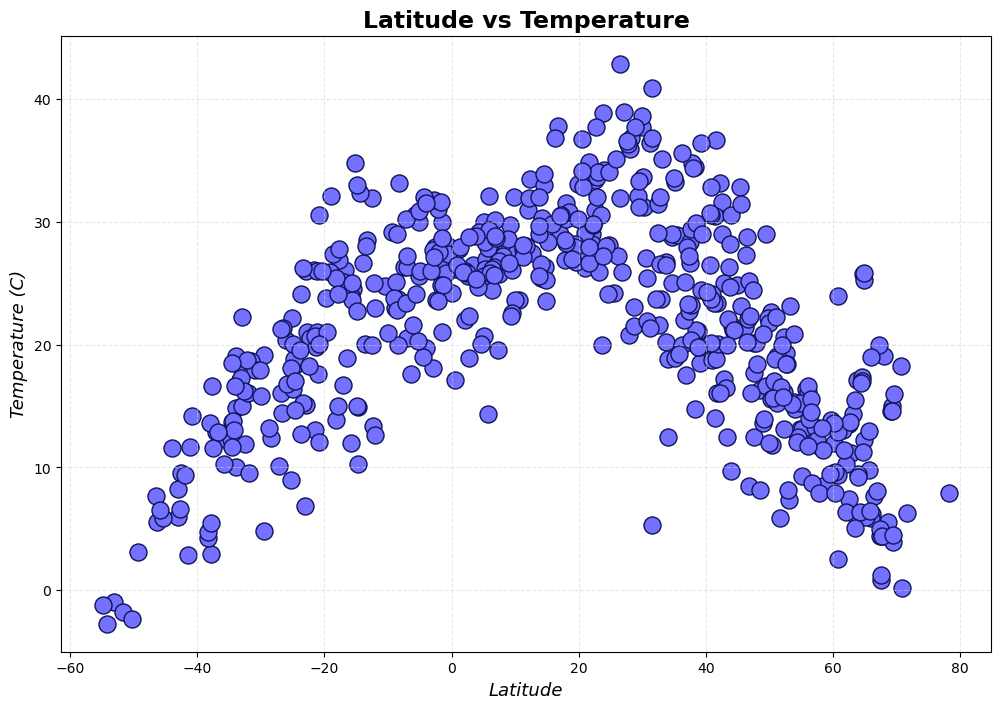

In [19]:
# Build scatter plot for latitude vs. temperature
#data
# import seaborn as sns
x=city_data_df.Lat
y=city_data_df['Max Temp']

#canvas
plt.figure(figsize=(12,8))

#plot
plt.scatter(x, y,facecolor="#7471ff", edgecolor="#101358", s=150)

# Incorporate the other graph properties
#customize
plt.xlabel("Latitude", fontsize=13, fontstyle="italic")
plt.ylabel("Temperature (C)", fontsize=13, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=17)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

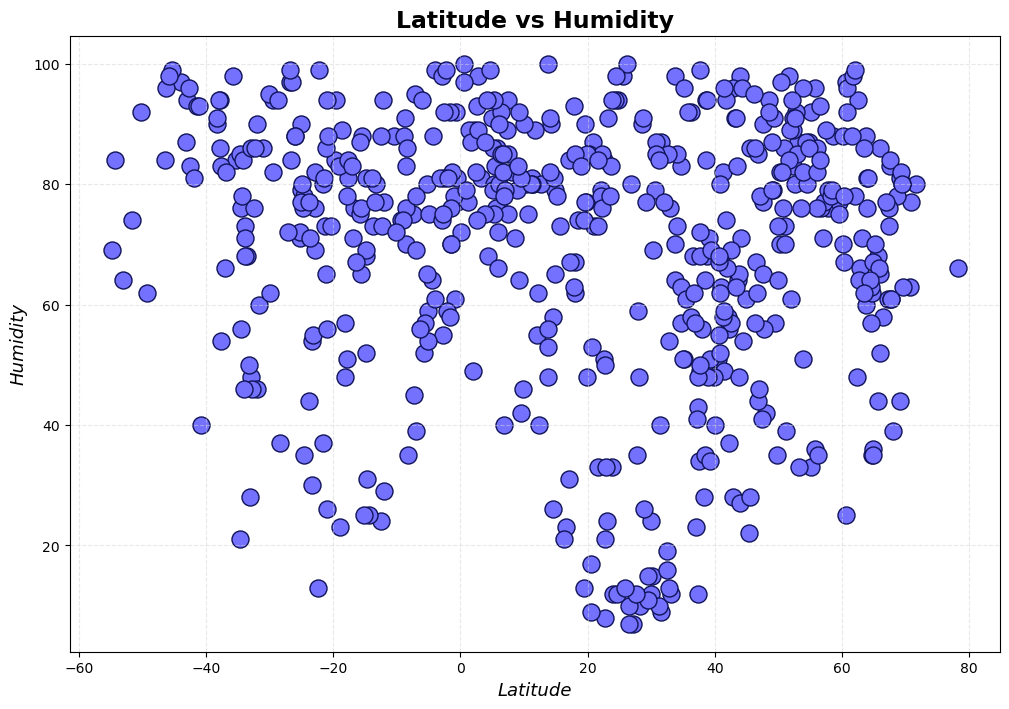

In [20]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x=city_data_df.Lat
y=city_data_df['Humidity']

#canvas
plt.figure(figsize=(12,8))

#plot
plt.scatter(x, y, facecolor="#7471ff", edgecolor="#101358", s=150)

# Incorporate the other graph properties
#customize
plt.xlabel("Latitude", fontsize=13, fontstyle="italic")
plt.ylabel("Humidity", fontsize=13, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=17)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

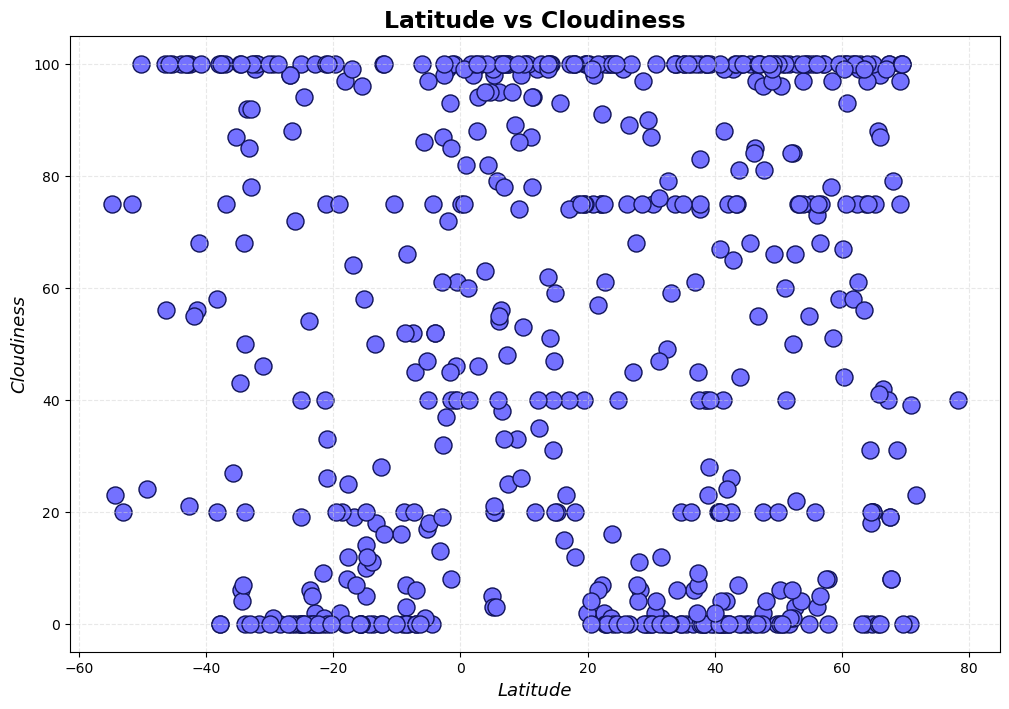

In [21]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x=city_data_df.Lat
y=city_data_df['Cloudiness']

#canvas
plt.figure(figsize=(12,8))

#plot
plt.scatter(x, y, facecolor="#7471ff", edgecolor="#101358", s=150)

# Incorporate the other graph properties
#customize
plt.xlabel("Latitude", fontsize=13, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=13, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=17)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

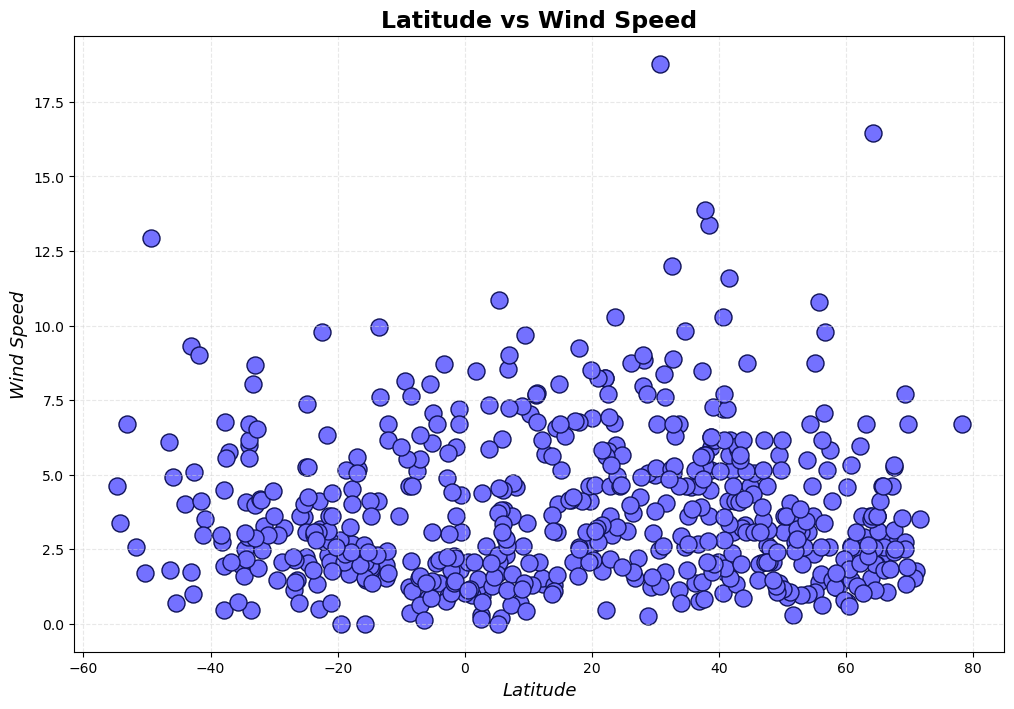

In [22]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df.Lat
y=city_data_df['Wind Speed']

#canvas
plt.figure(figsize=(12,8))

#plot
plt.scatter(x, y,facecolor="#7471ff", edgecolor="#101358", s=150)

# Incorporate the other graph properties
#customize
plt.xlabel("Latitude", fontsize=13, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=13, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=17)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
#Booth exa
def doRegression (x_val, y_val, x_title, y_title, annotation_pos):

    #line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_val = x_val * slope + intercept #prediction
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #canvas
    plt.figure(figsize=(12,8))
    
    #plot
    plt.scatter(x_val, y_val, facecolor="#7471ff", edgecolor="#101358", s=150)
    #line of best fit
    plt.plot(x_val, regress_val, "r-") 
    
    #customize
    plt.xlabel(x_title, fontsize=13, fontstyle="italic")
    plt.ylabel(y_title, fontsize=13, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=17)
    
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=17, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df=city_data_df.loc[city_data_df.Lat>=0]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iqaluit,63.7506,-68.5145,5.85,60.0,75.0,3.60,CA,1.718656e+09
4,porto novo,6.4965,2.6036,27.90,85.0,38.0,2.32,BJ,1.718656e+09
6,mili,6.0815,171.7350,28.07,76.0,95.0,3.80,MH,1.718656e+09
7,tarakan,3.3000,117.6333,26.49,81.0,100.0,2.62,ID,1.718656e+09
12,saudarkrokur,65.7461,-19.6394,9.78,68.0,88.0,2.34,IS,1.718656e+09


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df=city_data_df.loc[city_data_df.Lat<0]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.73,84.0,23.0,3.37,GS,1.718656e+09
1,mount gambier,-37.8333,140.7667,2.97,94.0,0.0,1.93,AU,1.718656e+09
3,waitangi,-43.9535,-176.5597,11.57,97.0,100.0,4.02,NZ,1.718656e+09
5,flying fish cove,-10.4217,105.6791,24.82,88.0,75.0,3.60,CX,1.718656e+09
8,bredasdorp,-34.5322,20.0403,13.69,76.0,6.0,2.52,ZA,1.718656e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.461175801619986


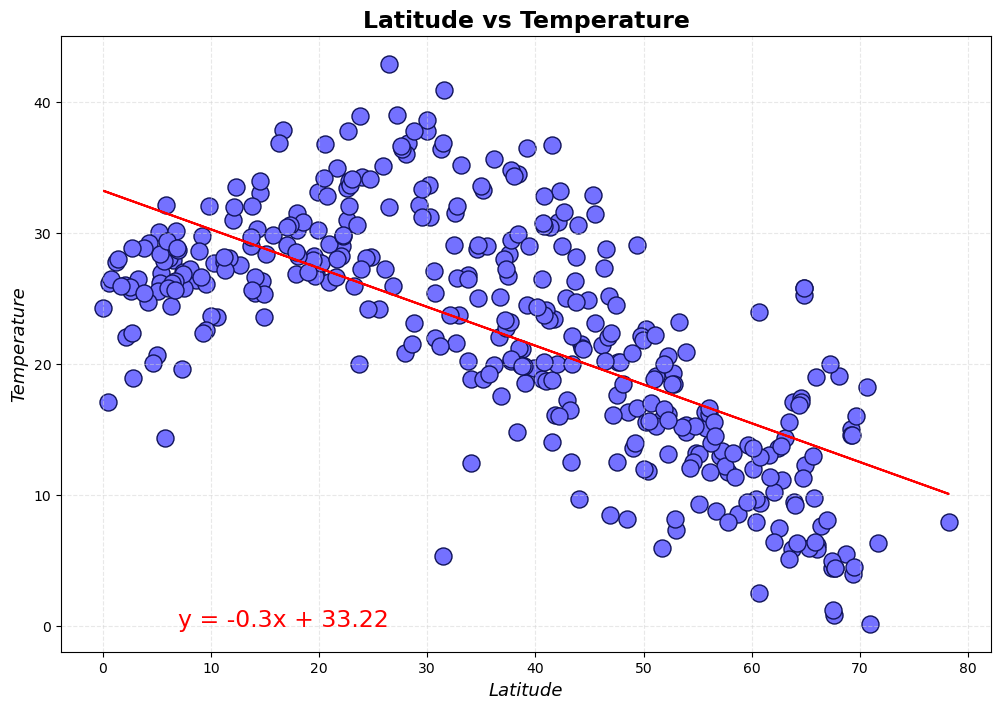

In [26]:
# Linear regression on Northern Hemisphere
x_val = north_hem_df.Lat
y_val = north_hem_df["Max Temp"]
x_title= "Latitude"
y_title="Temperature"
annotation_pos=(7,0)

doRegression(x_val, y_val, x_title, y_title, annotation_pos)

The r-squared is: 0.6408212517605656


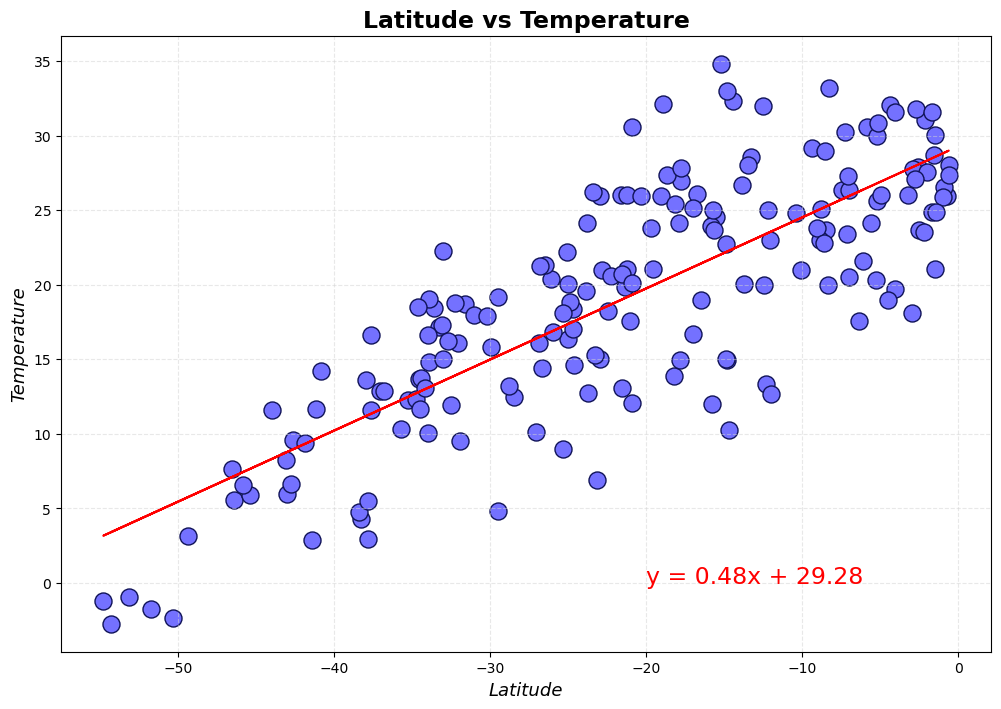

In [27]:
# Linear regression on Southern Hemisphere
x_val = south_hem_df.Lat
y_val = south_hem_df["Max Temp"]
x_title= "Latitude"
y_title="Temperature"
annotation_pos=(-20,0)

doRegression(x_val, y_val, x_title, y_title, annotation_pos)

**Discussion about the linear relationship:** Temperatures increase the closer you get to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00026645755978178245


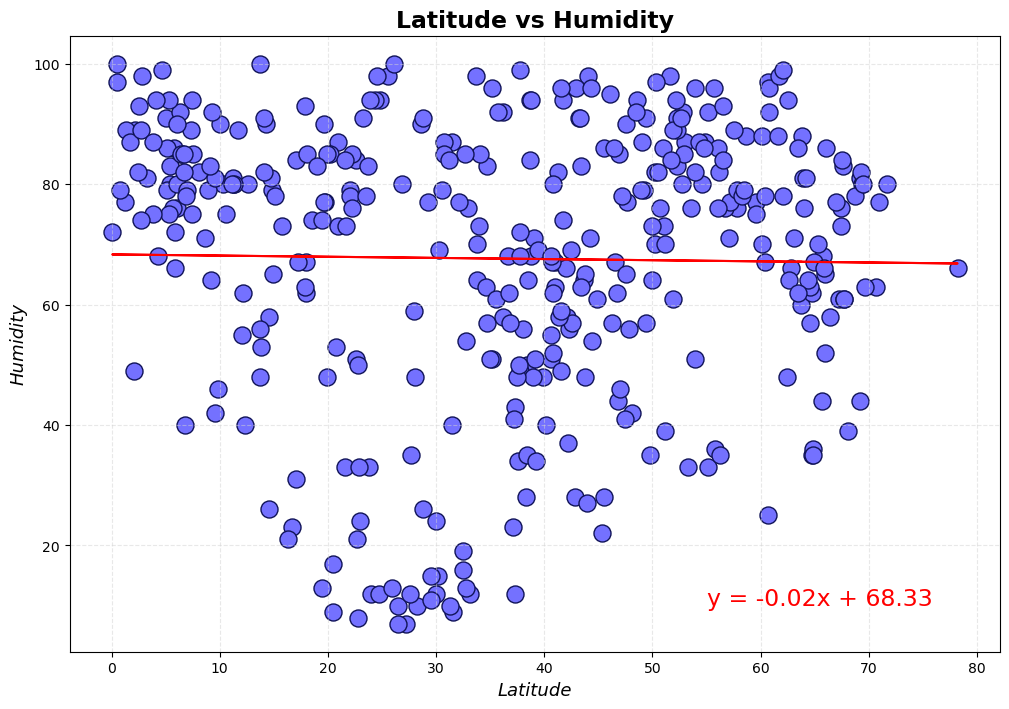

In [28]:
# Northern Hemisphere
x_val = north_hem_df.Lat
y_val = north_hem_df["Humidity"]
x_title= "Latitude"
y_title="Humidity"
annotation_pos=(55, 10)

doRegression(x_val, y_val, x_title, y_title, annotation_pos)

The r-squared is: 0.011421254571143765


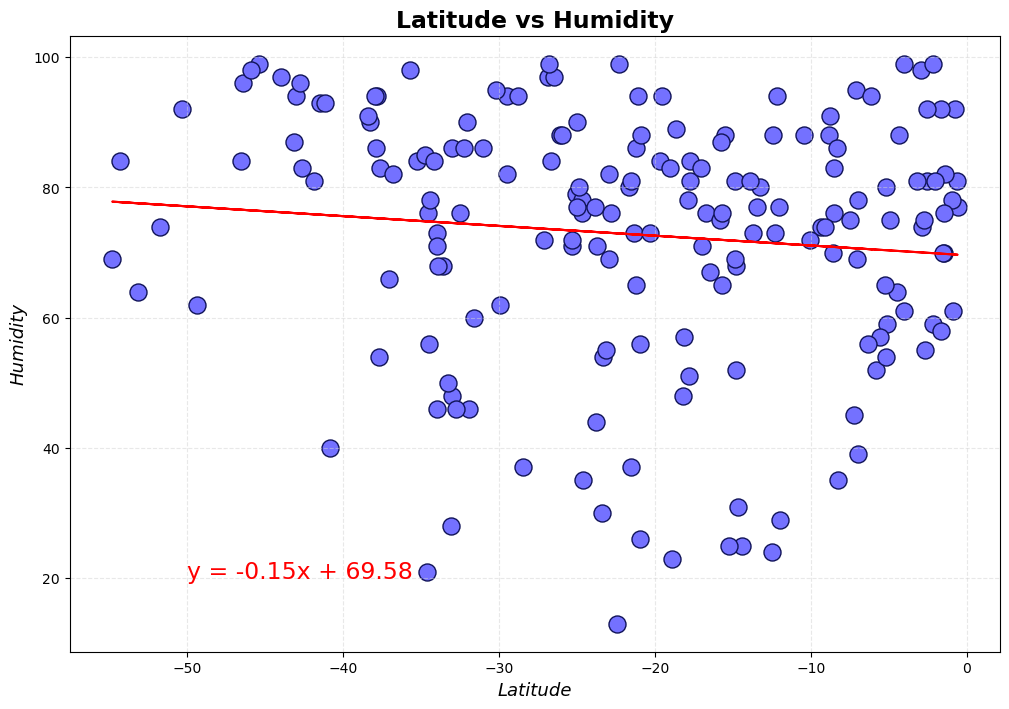

In [29]:
# Southern Hemisphere
x_val = south_hem_df.Lat
y_val = south_hem_df["Humidity"]
x_title= "Latitude"
y_title="Humidity"
annotation_pos=(-50,20)

doRegression(x_val, y_val, x_title, y_title, annotation_pos)

**Discussion about the linear relationship:** In the Northern hempishere latitude has little affect on humidity. In the southern hemisphere humidity decreases slightly the closer you get to the equator

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.008965408925320283


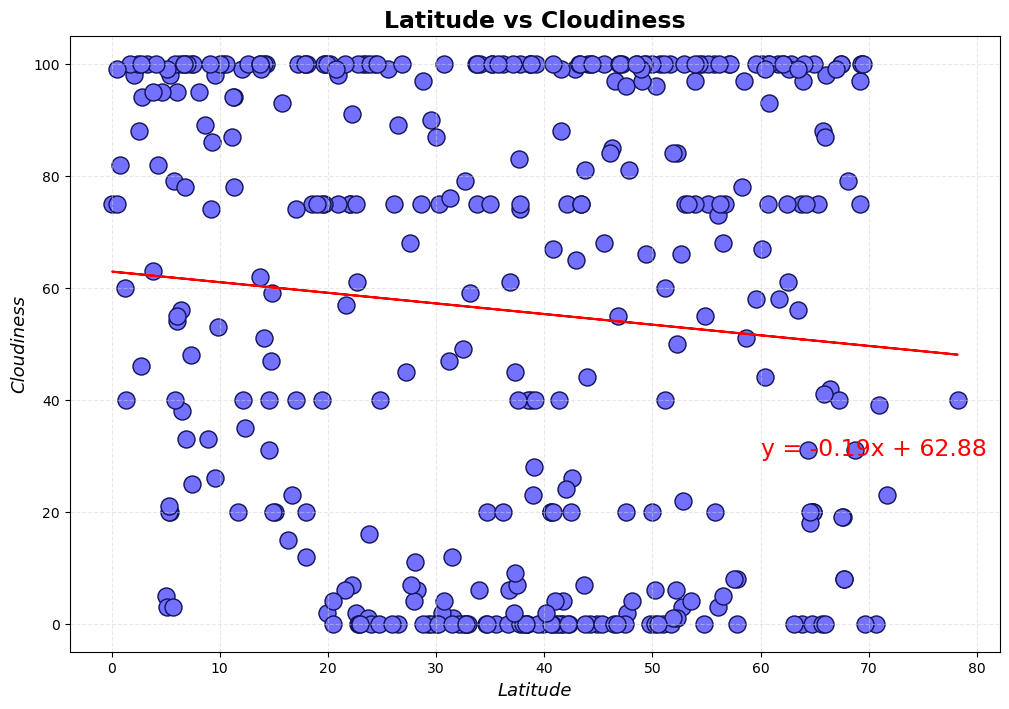

In [30]:
# Northern Hemisphere
x_val = north_hem_df.Lat
y_val = north_hem_df["Cloudiness"]
x_title= "Latitude"
y_title="Cloudiness"
annotation_pos=(60,30)

doRegression(x_val, y_val, x_title, y_title, annotation_pos)

The r-squared is: 0.03861569507775764


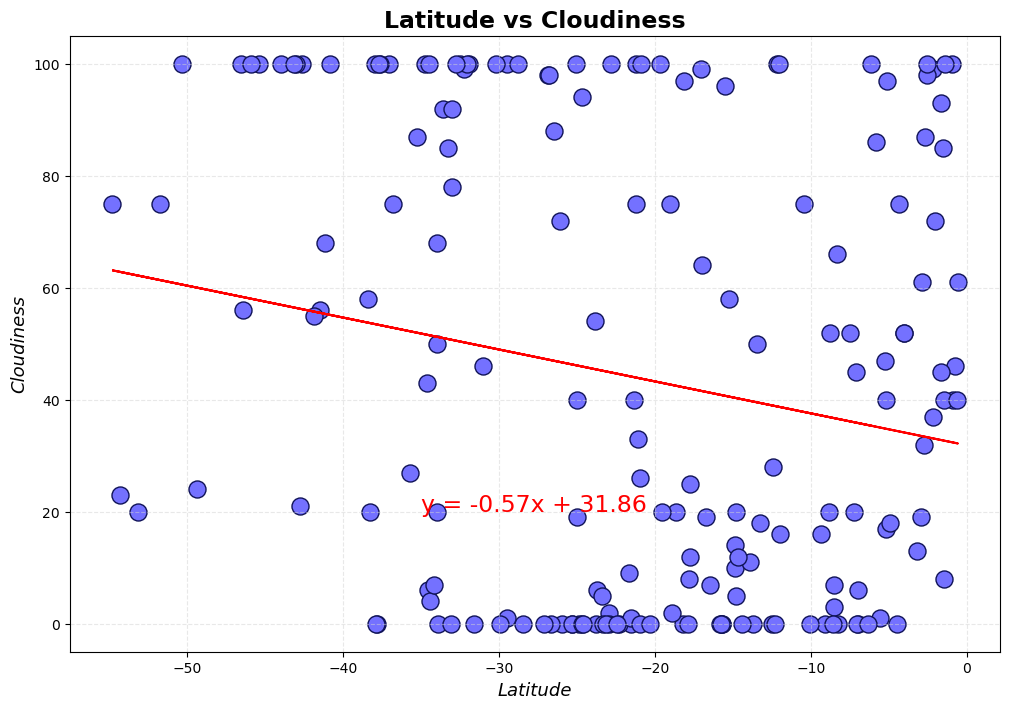

In [31]:
# Southern Hemisphere
x_val = south_hem_df.Lat
y_val = south_hem_df["Cloudiness"]
x_title= "Latitude"
y_title="Cloudiness"
annotation_pos=(-35,20)

doRegression(x_val, y_val, x_title, y_title, annotation_pos)

**Discussion about the linear relationship:** the further North you go, the less cloudy it is. Cloudiness decreases as Latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0045415135650109725


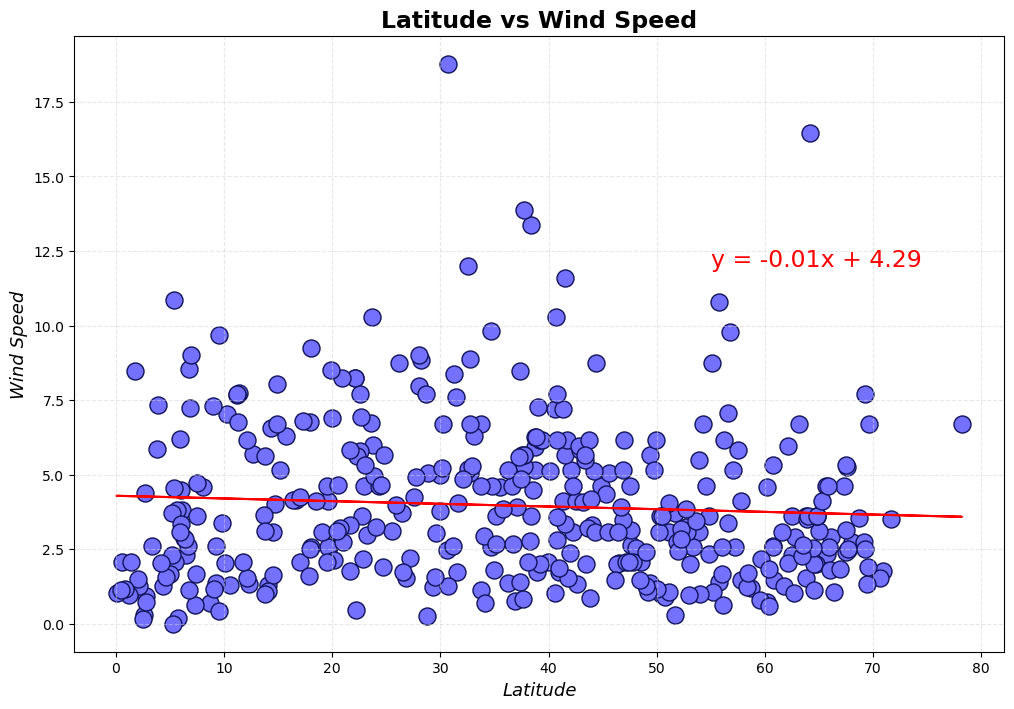

In [32]:
# Northern Hemisphere
x_val = north_hem_df.Lat
y_val = north_hem_df["Wind Speed"]
x_title= "Latitude"
y_title="Wind Speed"
annotation_pos=(55,12)

doRegression(x_val, y_val, x_title, y_title, annotation_pos)

The r-squared is: 0.0547531897818308


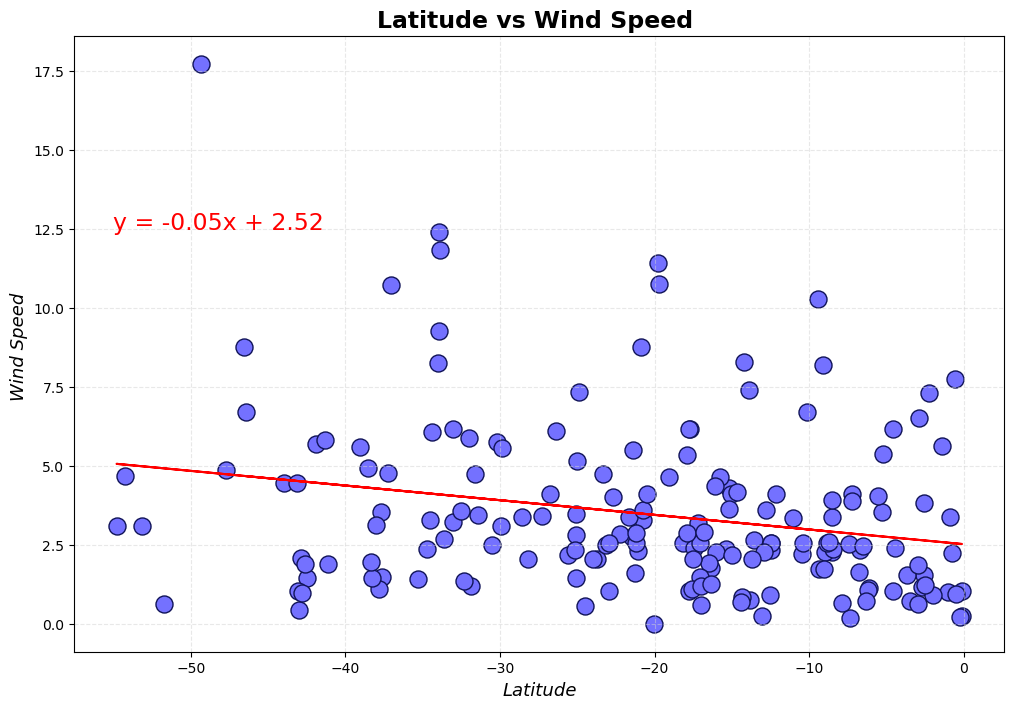

In [172]:
# Southern Hemisphere
x_val = south_hem_df.Lat
y_val = south_hem_df["Wind Speed"]
x_title= "Latitude"
y_title="Wind Speed "
annotation_pos=(-55,12.5)

doRegression(x_val, y_val, x_title, y_title, annotation_pos)

**Discussion about the linear relationship:** Wind speed decreases as Latitude increases